In [169]:
import pandas as pd
import networkx as nx
from networkx.algorithms.community import girvan_newman
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [170]:
df = pd.read_csv('data/shopping_trends.csv', nrows=50)
df.head(1000)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,PayPal,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


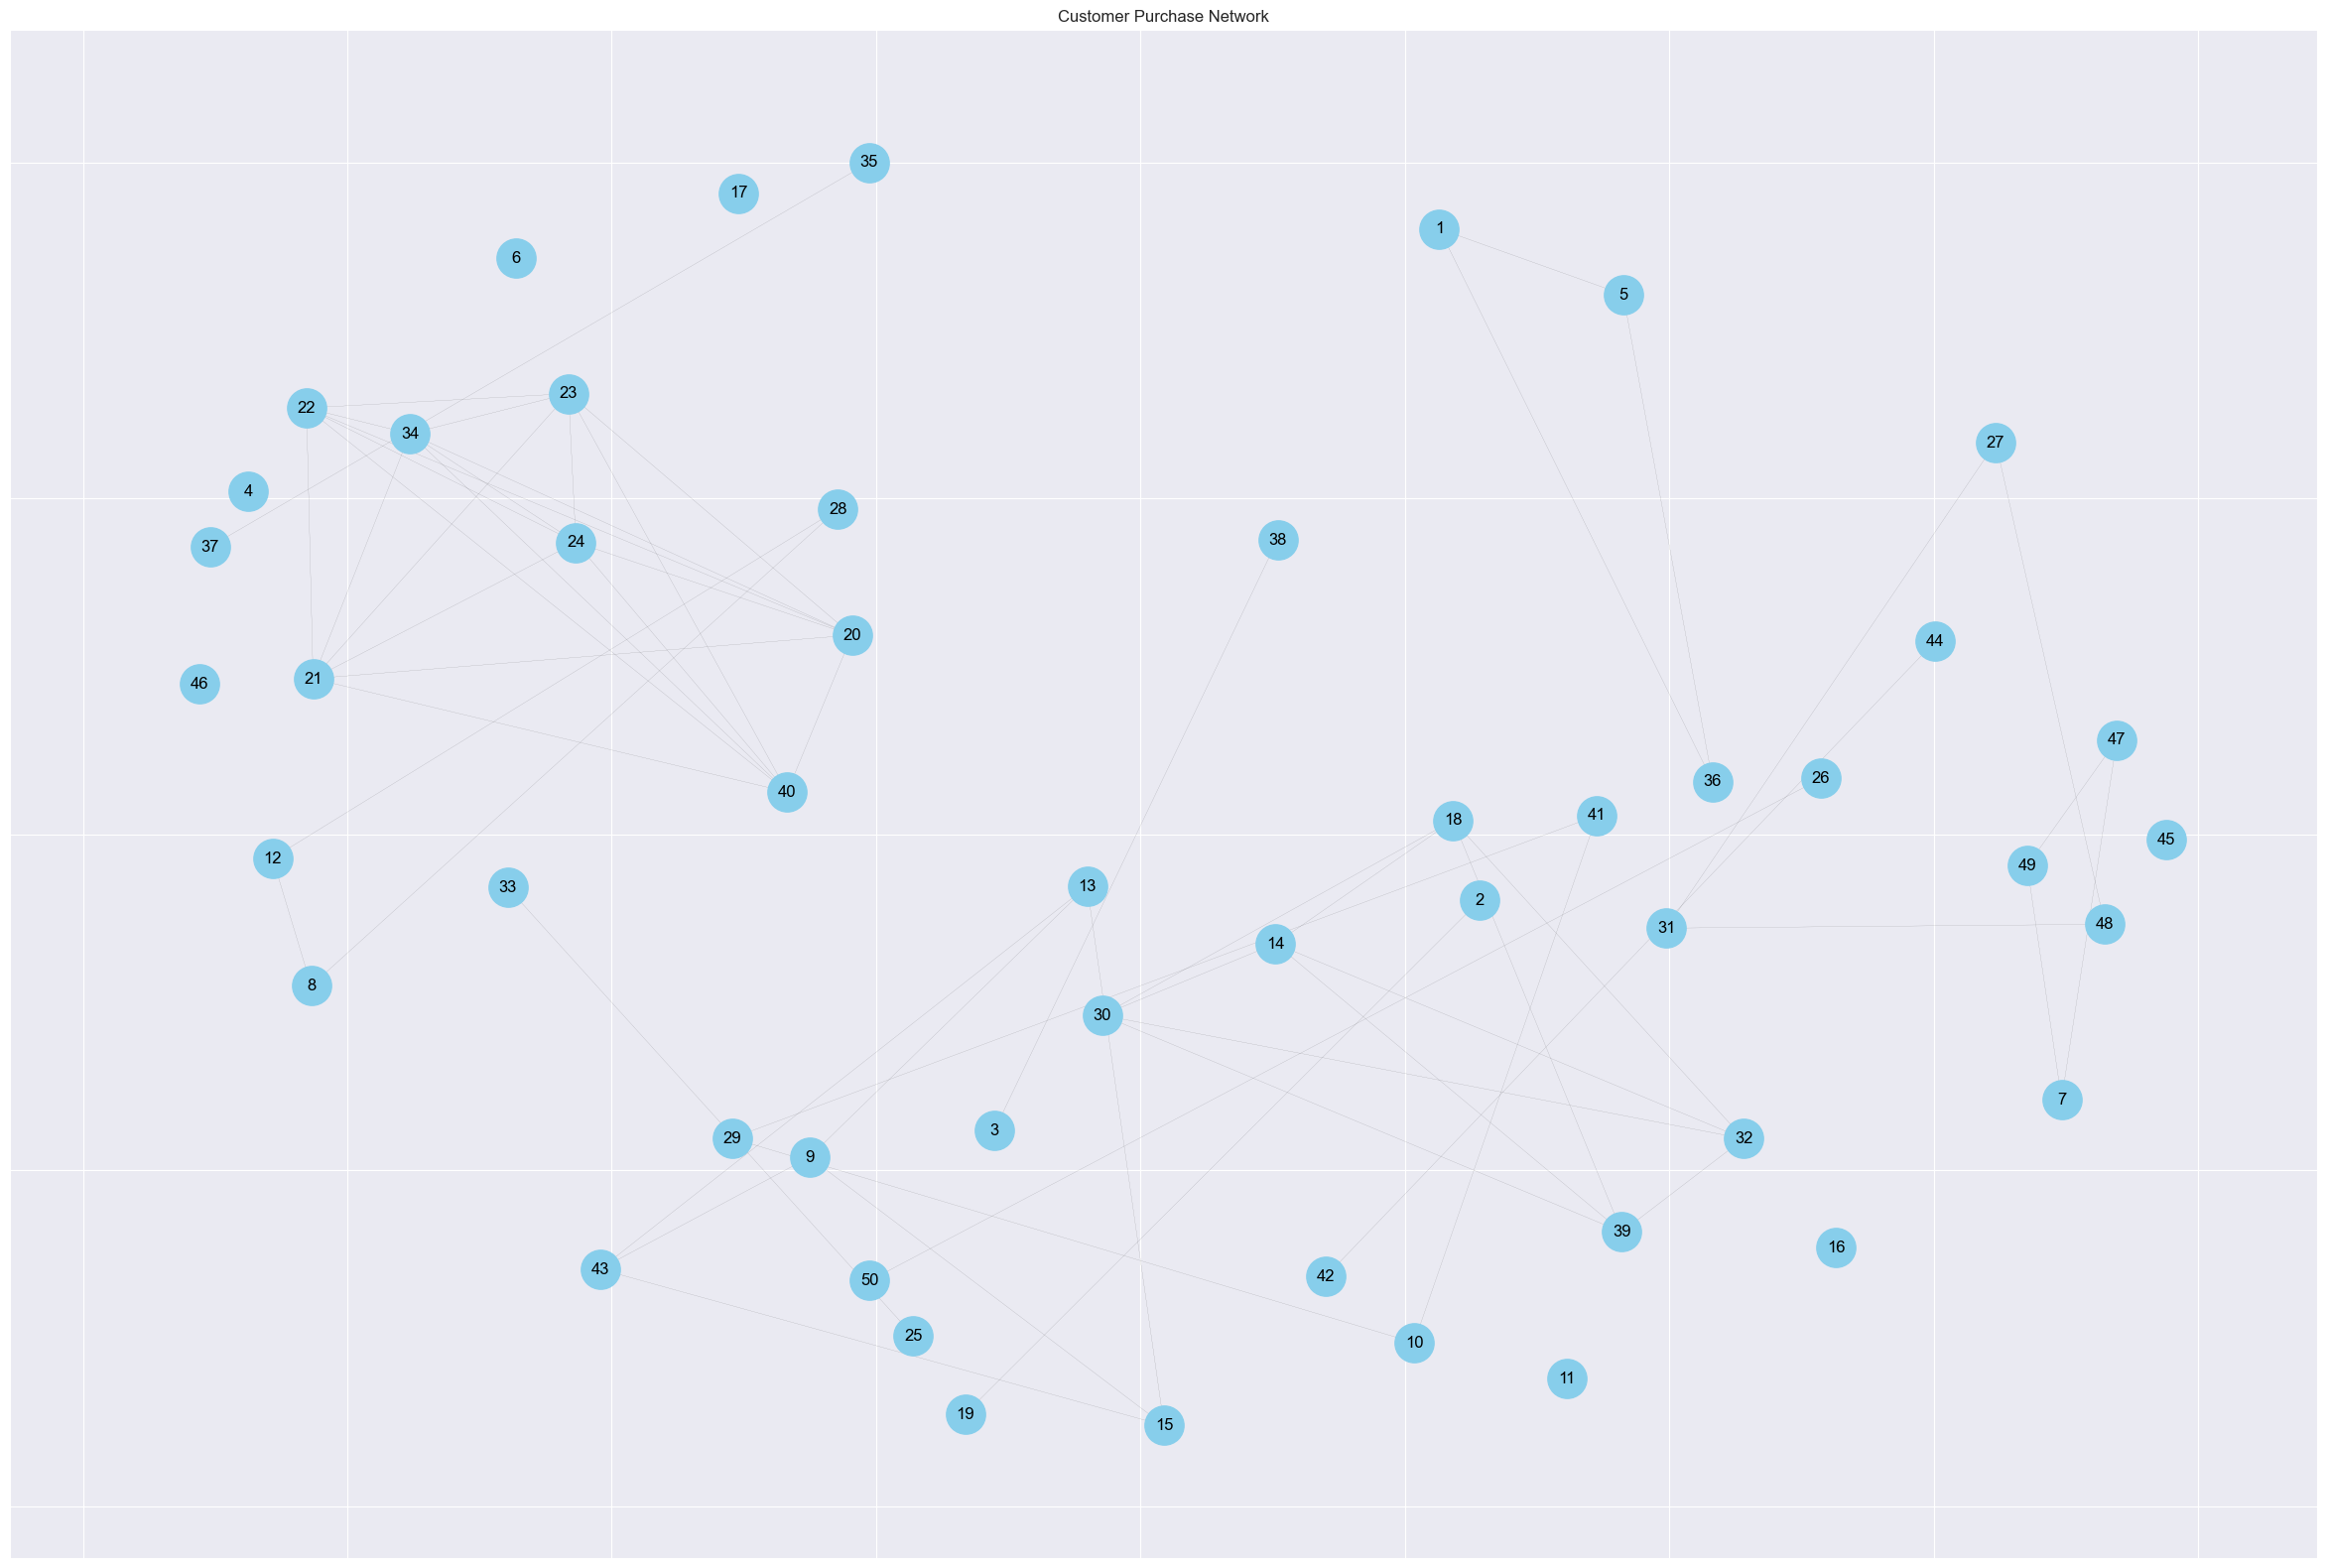

In [171]:
# Khởi tạo đồ thị
G = nx.Graph()

# Thêm các nút vào đồ thị với thuộc tính từ DataFrame
for index, row in df.iterrows():
    G.add_node(row['Customer ID'], **row.to_dict())

# Nhóm dữ liệu theo Category và Item Purchased, tạo danh sách khách hàng cho mỗi nhóm
product_category_groups = df.groupby(['Category', 'Item Purchased'])['Customer ID'].apply(list)

# Tính toán trọng số cho các cạnh
for (category, item), customers in product_category_groups.items():
    if len(customers) > 1:
        for i in range(len(customers)):
            for j in range(i + 1, len(customers)):
                if G.has_edge(customers[i], customers[j]):
                    G[customers[i]][customers[j]]['weight'] += 1
                else:
                    G.add_edge(customers[i], customers[j], weight=1, relationship='purchased_same_item', category=category, item=item)

# Vẽ đồ thị với trọng số cạnh
plt.figure(figsize=(30, 20))  # Kích thước của đồ thị
pos = nx.spring_layout(G, k=1, seed=42)  # Vị trí các nút
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='skyblue')
edges = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edges(G, pos, edgelist=edges.keys(), width=[weight * 0.1 for weight in edges.values()], alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Hiển thị đồ thị
plt.title("Customer Purchase Network")
plt.show()


# # Kiểm tra các cạnh đã thêm
# print("Edges in the graph:")
# for edge in G.edges(data=True):
# print(edge)

In [172]:
def girvan_newman(G):
    # Danh sách để lưu các cộng đồng
    communities = []
    
    # Lặp cho đến khi đồ thị còn nhiều hơn 1 thành phần liên thông
    while nx.number_connected_components(G) == 1:
        # Tính toán betweenness centrality cho các cạnh
        edge_betweenness = nx.edge_betweenness_centrality(G)
        
        # Tìm các cạnh có betweenness centrality cao nhất
        edge_to_remove = max(edge_betweenness, key=edge_betweenness.get)
        
        # Loại bỏ các cạnh có betweenness centrality cao nhất
        G.remove_edge(*edge_to_remove)
    
    # Lưu các cộng đồng
    for component in nx.connected_components(G):
        communities.append(component)
    
    return communities

# Áp dụng giải thuật Girvan-Newman
communities = girvan_newman(G)

# In kết quả
print("Communities found:", communities)

Communities found: [{1, 36, 5}, {2, 19}, {3, 38}, {4}, {6}, {49, 47, 7}, {8, 12, 28}, {9, 43, 13, 15}, {41, 10, 29}, {11}, {32, 39, 14, 18, 30}, {16}, {17}, {34, 40, 20, 21, 22, 23, 24}, {25, 33}, {26, 50}, {48, 27, 31}, {35, 37}, {42, 44}, {45}, {46}]


In [173]:
# # Áp dụng giải thuật Girvan-Newman
# communities = girvan_newman(G)
# 
# # Lấy kết quả phân hoạch của các cộng đồng
# first_level_communities = next(communities)
# print(list(first_level_communities))

{1, 36, 5}
{2, 19}
{3, 38}
{4}
{6}
{49, 47, 7}
{8, 12, 28}
{9, 43, 13, 15}
{41, 10, 29}
{11}
{32, 39, 14, 18, 30}
{16}
{17}
{34, 40, 20, 21, 22, 23, 24}
{25, 33}
{26, 50}
{48, 27, 31}
{35, 37}
{42, 44}
{45}
{46}


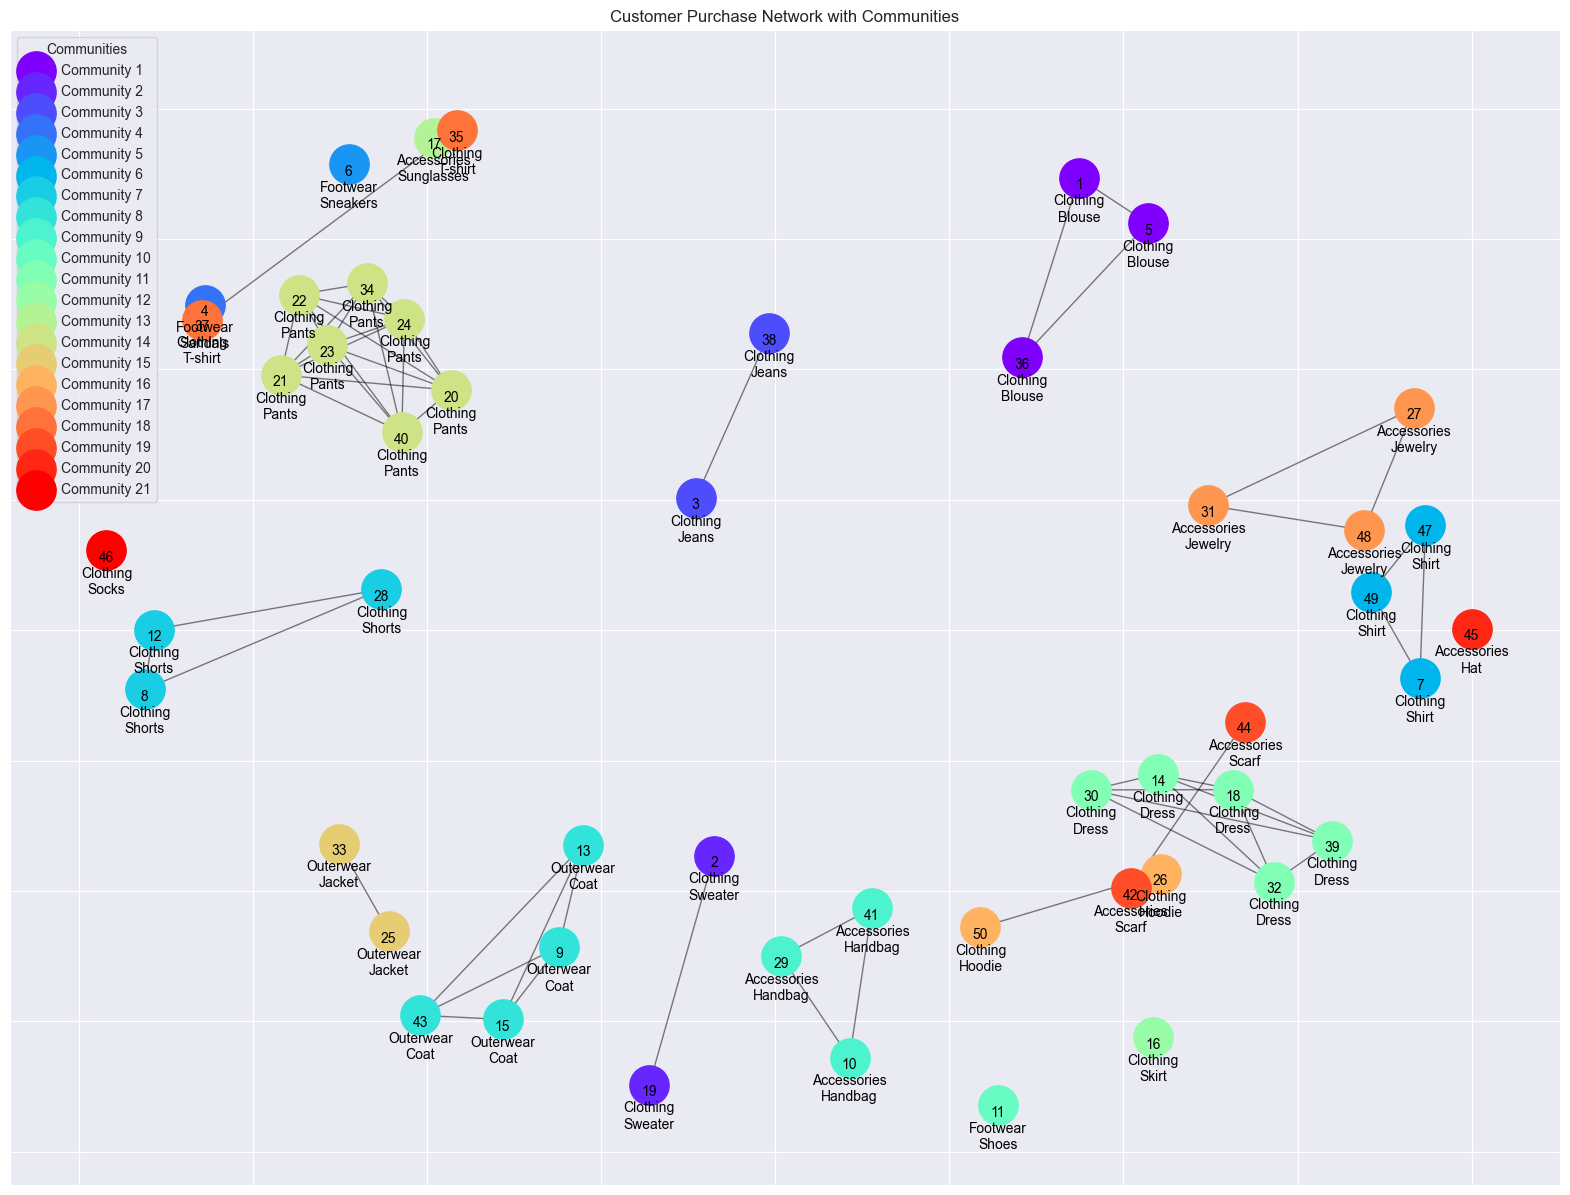

In [193]:

# Giải thuật Girvan-Newman
def girvan_newman(G):
    communities = []
    while nx.number_connected_components(G) == 1:
        edge_betweenness = nx.edge_betweenness_centrality(G)
        edge_to_remove = max(edge_betweenness, key=edge_betweenness.get)
        G.remove_edge(*edge_to_remove)
    for component in nx.connected_components(G):
        print(component)
        communities.append(component)
    return communities

# Áp dụng giải thuật Girvan-Newman
communities = girvan_newman(G)

# Tạo danh sách màu sắc cho các cộng đồng
colors = plt.cm.rainbow(np.linspace(0, 1, len(communities)))

# Vẽ đồ thị
plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G, k=0.5, seed=42)

# Vẽ các nút và cạnh
for i, community in enumerate(communities):
    # print(community)
    # print(communities)
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=[colors[i]], node_size=800, label=f'Community {i+1}')

# Vẽ các cạnh
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=1.0, alpha=0.5)

# Tạo nhãn cho các nút với thông tin từ thuộc tính
labels = {}
for node in G.nodes(data=True):
    customer_id = node[0]
    attributes = node[1]
    # Tạo nhãn cho mỗi nút bao gồm Customer ID, Category và Item Purchased
    labels[customer_id] = f"{customer_id}\n{attributes.get('Category', 'N/A')}\n{attributes.get('Item Purchased', 'N/A')}"

# Vẽ nhãn cho các nút
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_family='sans-serif', verticalalignment='top')

# Thêm chú giải cho các cộng đồng
plt.legend(loc='best', title="Communities", fontsize=10)
plt.title("Customer Purchase Network with Communities")
plt.show()

In [177]:
# # Vẽ đồ thị với các cộng đồng được phân biệt bằng màu sắc
# pos = nx.spring_layout(G)
# plt.figure(figsize=(12, 12))
# 
# # Vẽ các cộng đồng
# for community in first_level_communities:
#     nodes = list(community)
#     nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='red')
#     nx.draw_networkx_edges(G, pos)
#     nx.draw_networkx_labels(G, pos)
# 
# lt.show()